In [56]:
import cv2

import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from IPython.display import display

from utils.skeleton_keypoints import compare_keypoints_list
keypoints_columns = [f"{keypoint}_{axis}" for keypoint in compare_keypoints_list for axis in ["x", "y"]]

In [57]:
df_sync = pd.read_csv("camera_sync.csv")
display(df_sync)

,max_lim_0,max_lim_1,max_lim_2,max_lim_3,max_lim_4,toe_off_0,toe_off_1,toe_off_2,toe_off_3,toe_off_4
0,NaN,NaN,NaN,NaN,NaN,73,76,77,77,76
1,NaN,NaN,NaN,NaN,NaN,84,87,88,88,87
2,NaN,NaN,NaN,NaN,NaN,92,95,96,96,95
3,NaN,NaN,NaN,NaN,NaN,116,119,120,120,119
4,NaN,NaN,NaN,NaN,NaN,62,65,66,66,65
5,NaN,NaN,NaN,NaN,NaN,102,105,106,106,105
6,NaN,NaN,NaN,NaN,NaN,106,109,110,110,109
7,NaN,NaN,NaN,NaN,NaN,135,138,139,139,138
8,NaN,NaN,NaN,NaN,NaN,68,71,72,72,71
9,NaN,NaN,NaN,NaN,NaN,63,66,67,67,66


In [58]:
camera_num = 2
data_num = 1

In [59]:
json_dict = {
    0: "28/kitano_iphone16.json",
    2: "28/uratani_iphone15pro.json",
    3: "28/ebihara_iphone15.json",
    4: "28/kitano_iphone11.json",
}

In [60]:
with open(json_dict[camera_num]) as f:
    camera_calibration = json.load(f)
mtx = np.array(camera_calibration["mtx"])
dist = np.array(camera_calibration["dist"])
print(f"mtx: {mtx}")
print(f"dist: {dist}")

mtx: [[1.53552745e+03 0.00000000e+00 9.63469689e+02]
 [0.00000000e+00 1.52788031e+03 5.71606556e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist: [[ 0.34401354 -0.91580613  0.01204865  0.02273224  1.68878462]]


In [61]:
df_2d = pd.read_csv(f"28/hirasaki_{camera_num}_{data_num}.csv", index_col=0)
df_2d = df_2d.drop(columns=[col for col in df_2d.columns if "visibility" in col])
columns_basic = [s.replace("_x", "")for  s in df_2d.filter(regex="_x").columns]
lag = df_sync.filter(like="toe").iloc[data_num, camera_num] - df_sync.filter(like="toe").iloc[data_num].min()
df_2d.index -= lag
df_2d = df_2d[df_2d.index >= 1]
display(df_2d)

df_3d = pd.read_csv(f"28/hirasaki_{data_num}_trajectories.csv", index_col=0)
del df_3d["time"]
display(df_3d)

,RWRL_x,RWRL_y,RWRM_x,RWRM_y,RELL_x,RELL_y,RELM_x,RELM_y,RSHF_x,RSHF_y,...,LKNL_x,LKNL_y,LKNM_x,LKNM_y,LTRO_x,LTRO_y,REAR_x,REAR_y,LEAR_x,LEAR_y
frame,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,RWRL_x,RWRL_y,RWRL_z,RWRM_x,RWRM_y,RWRM_z,RELL_x,RELL_y,RELL_z,RELM_x,...,LKNM_z,LTRO_x,LTRO_y,LTRO_z,REAR_x,REAR_y,REAR_z,LEAR_x,LEAR_y,LEAR_z
frame,,,,,,,,,,,,,,,,,,,,,
1,879.841736,2354.373535,905.190186,876.802429,2428.713623,884.256226,850.187744,2428.793457,1122.813232,941.480469,...,520.843018,1193.700195,2328.791260,922.146240,991.757141,2547.486816,912.910339,1175.886230,2538.031250,921.768005
2,879.948324,2353.461060,905.284800,876.736959,2427.855550,884.573466,850.236429,2427.877889,1122.970683,941.497396,...,520.994476,1193.900289,2329.703206,921.858043,991.647339,2546.792766,912.922201,1175.871969,2537.736124,921.902120
3,880.145264,2352.745036,905.383566,876.764832,2426.966715,884.761007,850.293925,2426.952148,1123.162720,941.456502,...,521.087443,1194.186930,2329.435953,922.004557,991.505249,2546.151774,912.979675,1175.746460,2537.447184,921.936483
4,880.242157,2351.761963,905.751922,877.044495,2426.166748,884.785766,850.345612,2426.024780,1123.380981,941.395050,...,521.160187,1194.475525,2329.204956,922.174500,991.417450,2545.688111,913.065125,1175.655334,2537.229126,921.961181
5,880.351136,2350.953694,905.908102,877.196757,2425.357584,885.005940,850.350830,2425.110026,1123.563070,941.374451,...,521.229166,1194.671020,2328.921793,922.228719,991.418925,2545.322266,913.170003,1175.650268,2536.946126,921.920451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,860.512634,-977.245422,900.502136,865.572662,-901.522155,887.288604,847.680633,-917.755004,1128.467468,944.137878,...,532.934753,1213.028635,-1034.648378,936.741384,979.149903,-850.954986,910.774536,1168.068360,-842.112915,909.198182
215,862.257141,-1022.786011,910.381124,864.844015,-947.330810,891.930522,846.712179,-947.229594,1133.668783,941.428100,...,543.430399,1214.477250,-1053.024489,947.778022,982.148092,-864.413127,913.582886,1171.284749,-860.639262,913.157918
216,864.189077,-1065.973125,923.199320,864.407257,-993.212280,897.597402,845.561646,-975.949737,1138.361938,938.563924,...,553.158091,1216.661528,-1071.613629,960.401271,987.031555,-878.245595,915.774770,1174.764791,-879.653646,916.101329


In [62]:
df_2d = df_2d.loc[df_2d.notnull().any(axis=1), df_2d.notnull().any(axis=0)]
display(df_2d)

columns_org = [s.replace("_x", "")for  s in df_2d.filter(regex="_x").columns]
columns_xyz = [s + axis for s in columns_org for axis in ["_x", "_y", "_z"]]
df_3d = df_3d.loc[df_2d.index]
df_3d = df_3d[columns_xyz]
display(df_3d)

,RWRL_x,RWRL_y,RELL_x,RELL_y,RSHF_x,RSHF_y,LWRL_x,LWRL_y,LELL_x,LELL_y,...,RKNL_x,RKNL_y,RTRO_x,RTRO_y,LANL_x,LANL_y,LKNL_x,LKNL_y,LTRO_x,LTRO_y
frame,,,,,,,,,,,,,,,,,,,,,
30,872.0,513.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,865.0,462.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,888.0,405.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,966.0,515.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,980.0,466.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,890.0,603.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,901.0,512.0,NaN,NaN,NaN,NaN,NaN,NaN


,RWRL_x,RWRL_y,RWRL_z,RELL_x,RELL_y,RELL_z,RSHF_x,RSHF_y,RSHF_z,LWRL_x,...,RTRO_z,LANL_x,LANL_y,LANL_z,LKNL_x,LKNL_y,LKNL_z,LTRO_x,LTRO_y,LTRO_z
frame,,,,,,,,,,,,,,,,,,,,,
30,879.813334,2340.898275,902.122731,848.179088,2407.743937,1122.103821,956.766276,2354.172445,1365.469584,1272.677063,...,916.042796,1197.195496,2483.793497,75.698855,1236.899678,2441.929647,489.419464,1195.312785,2324.048177,921.678894
31,879.752136,2339.847412,901.874451,848.542786,2405.974365,1122.062744,957.156494,2352.709229,1365.542480,1272.826416,...,915.944458,1197.335327,2483.883789,75.716026,1237.231812,2441.236816,489.364075,1195.340942,2322.423096,921.614258
32,879.934936,2339.005493,901.308584,848.907033,2404.103963,1122.034688,957.619324,2351.216838,1365.628561,1273.133321,...,915.863271,1197.494263,2484.008748,75.747593,1237.677023,2440.801555,489.430674,1195.589783,2321.759644,920.961222
33,880.040649,2337.564046,901.228495,849.363057,2402.214111,1121.954305,958.135396,2349.660319,1365.516357,1273.142009,...,915.674174,1197.486939,2484.132975,75.668895,1238.128866,2440.375407,489.373413,1196.027344,2320.503093,920.602681
34,880.058227,2336.358155,900.632935,849.902802,2400.432007,1121.794922,958.663330,2348.054200,1365.407593,1273.444702,...,915.439545,1197.574951,2484.191773,75.636005,1238.695251,2439.928711,489.276886,1196.811401,2319.095947,920.276367
35,880.193848,2334.631511,900.375122,850.451884,2398.835286,1121.596802,959.287211,2346.492838,1365.253947,1273.505249,...,915.206177,1197.638672,2484.291423,75.560748,1239.343302,2439.384440,489.199208,1197.786417,2317.607910,920.043681
36,880.436554,2332.861409,900.126159,851.148702,2397.345703,1121.398519,959.950348,2344.757649,1365.008280,1273.655701,...,914.853383,1197.751404,2484.374389,75.543512,1240.147013,2438.560099,489.029612,1198.980022,2315.757039,919.697947
37,880.665710,2331.222412,900.096375,851.919556,2396.115723,1121.271973,960.791931,2342.829834,1364.760986,1273.940918,...,914.513245,1197.931152,2484.558594,75.636536,1241.063110,2437.564453,488.881439,1200.343262,2313.744141,919.409607
38,881.117239,2329.387981,900.100352,852.844187,2394.955444,1121.124776,961.779531,2340.668620,1364.368144,1274.315369,...,914.266469,1198.046183,2484.626343,75.509643,1242.039795,2436.295410,488.587972,1201.698344,2311.515219,918.986318


In [63]:
points_2d, points_3d = [], []

for col in columns_org:
    for idx in df_2d.index:
        if not np.isnan(df_2d.loc[idx, col + "_x"]):
            points_2d.append(df_2d.loc[idx, [col + "_x", col + "_y"]].values)
            points_3d.append(df_3d.loc[idx, [col + "_x", col + "_y", col + "_z"]].values)

points_2d, points_3d = np.array(points_2d), np.array(points_3d)
print(points_2d.shape, points_3d.shape)

(30, 2) (30, 3)


In [64]:
_, rvec, tvec, inliers = cv2.solvePnPRansac(points_3d, points_2d, mtx, None, flags=cv2.SOLVEPNP_EPNP)
print(f"rvec: {rvec}")
print(f"tvec: {tvec}")

rvec: [[ 1.68636132]
 [-0.02822834]
 [-0.00542932]]
tvec: [[-1208.70075672]
 [  946.70655755]
 [ 4295.06059592]]


In [ ]:
with open(f"28/hirasaki_{camera_num}_extrinsic.json", "w") as f:
    json.dump({
        "mtx": mtx.tolist(),
        "dist": dist.tolist(),
        "rvec": rvec.tolist(),
        "tvec": tvec.tolist()
    }, f)

In [66]:
rotation_matrix, _ = cv2.Rodrigues(rvec)
projection_matrix = np.hstack((rotation_matrix, tvec))

In [67]:
df_2d = pd.read_csv(f"28/hirasaki_{camera_num}_{data_num}.csv", index_col=0)
df_2d = df_2d.drop(columns=[col for col in df_2d.columns if "visibility" in col])
columns_basic = [s.replace("_x", "")for  s in df_2d.filter(regex="_x").columns]
columns_xy = df_2d.columns
lag = df_sync.filter(like="toe").iloc[data_num, camera_num] - df_sync.filter(like="toe").iloc[data_num].min()
df_2d.index -= lag
display(df_2d)

df_3d = pd.read_csv(f"28/hirasaki_{data_num}_trajectories.csv", index_col=0)
del df_3d["time"]
display(df_3d)

,RWRL_x,RWRL_y,RWRM_x,RWRM_y,RELL_x,RELL_y,RELM_x,RELM_y,RSHF_x,RSHF_y,...,LKNL_x,LKNL_y,LKNM_x,LKNM_y,LTRO_x,LTRO_y,REAR_x,REAR_y,LEAR_x,LEAR_y
frame,,,,,,,,,,,,,,,,,,,,,
-3,872.0,514.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,RWRL_x,RWRL_y,RWRL_z,RWRM_x,RWRM_y,RWRM_z,RELL_x,RELL_y,RELL_z,RELM_x,...,LKNM_z,LTRO_x,LTRO_y,LTRO_z,REAR_x,REAR_y,REAR_z,LEAR_x,LEAR_y,LEAR_z
frame,,,,,,,,,,,,,,,,,,,,,
1,879.841736,2354.373535,905.190186,876.802429,2428.713623,884.256226,850.187744,2428.793457,1122.813232,941.480469,...,520.843018,1193.700195,2328.791260,922.146240,991.757141,2547.486816,912.910339,1175.886230,2538.031250,921.768005
2,879.948324,2353.461060,905.284800,876.736959,2427.855550,884.573466,850.236429,2427.877889,1122.970683,941.497396,...,520.994476,1193.900289,2329.703206,921.858043,991.647339,2546.792766,912.922201,1175.871969,2537.736124,921.902120
3,880.145264,2352.745036,905.383566,876.764832,2426.966715,884.761007,850.293925,2426.952148,1123.162720,941.456502,...,521.087443,1194.186930,2329.435953,922.004557,991.505249,2546.151774,912.979675,1175.746460,2537.447184,921.936483
4,880.242157,2351.761963,905.751922,877.044495,2426.166748,884.785766,850.345612,2426.024780,1123.380981,941.395050,...,521.160187,1194.475525,2329.204956,922.174500,991.417450,2545.688111,913.065125,1175.655334,2537.229126,921.961181
5,880.351136,2350.953694,905.908102,877.196757,2425.357584,885.005940,850.350830,2425.110026,1123.563070,941.374451,...,521.229166,1194.671020,2328.921793,922.228719,991.418925,2545.322266,913.170003,1175.650268,2536.946126,921.920451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,860.512634,-977.245422,900.502136,865.572662,-901.522155,887.288604,847.680633,-917.755004,1128.467468,944.137878,...,532.934753,1213.028635,-1034.648378,936.741384,979.149903,-850.954986,910.774536,1168.068360,-842.112915,909.198182
215,862.257141,-1022.786011,910.381124,864.844015,-947.330810,891.930522,846.712179,-947.229594,1133.668783,941.428100,...,543.430399,1214.477250,-1053.024489,947.778022,982.148092,-864.413127,913.582886,1171.284749,-860.639262,913.157918
216,864.189077,-1065.973125,923.199320,864.407257,-993.212280,897.597402,845.561646,-975.949737,1138.361938,938.563924,...,553.158091,1216.661528,-1071.613629,960.401271,987.031555,-878.245595,915.774770,1174.764791,-879.653646,916.101329


In [68]:
points_3d_all = df_3d.values.reshape(-1, 3)
points_2d_projected, _ = cv2.projectPoints(points_3d_all, rvec, tvec, mtx, None)
points_2d_projected = points_2d_projected.reshape(-1, 2)
points_2d_projected = points_2d_projected.reshape(-1, len(columns_basic)*2)

df_2d_projected = pd.DataFrame(points_2d_projected, columns=columns_xy)
df_2d_projected

,RWRL_x,RWRL_y,RWRM_x,RWRM_y,RELL_x,RELL_y,RELM_x,RELM_y,RSHF_x,RSHF_y,...,LKNL_x,LKNL_y,LKNM_x,LKNM_y,LTRO_x,LTRO_y,REAR_x,REAR_y,LEAR_x,LEAR_y
0,873.346526,514.889098,873.510832,518.380173,865.806031,463.350349,887.492686,466.611772,888.677952,405.898447,...,959.500977,605.320128,928.880498,599.909477,946.963295,509.820984,900.720817,509.164245,942.669196,506.424047
1,873.361790,514.883225,873.485135,518.323422,865.806194,463.323076,887.488263,466.591025,888.648053,405.819510,...,959.473458,605.337031,928.850418,599.904273,947.010852,509.871340,900.691723,509.173849,942.665409,506.398589
2,873.400234,514.872335,873.481615,518.296638,865.808076,463.287825,887.471336,466.535027,888.681230,405.776544,...,959.453649,605.335854,928.835771,599.910820,947.077933,509.840343,900.655301,509.172381,942.636714,506.396187
3,873.410786,514.803992,873.538479,518.304443,865.808416,463.246517,887.448011,466.476926,888.718643,405.803133,...,959.429225,605.368563,928.820777,599.918276,947.145320,509.803215,900.632120,509.161309,942.615883,506.394637
4,873.427284,514.781833,873.564447,518.268034,865.798289,463.213696,887.437807,466.458411,888.735263,405.762763,...,959.401345,605.391544,928.803442,599.927308,947.191426,509.794537,900.629758,509.143745,942.615057,506.408583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,796.426860,640.738822,802.232624,641.113048,789.458949,531.003491,836.080284,538.615259,835.753678,413.377225,...,1001.164251,819.231682,940.019177,820.679771,963.955696,624.126731,855.938726,625.702660,942.337441,623.893582
214,795.080206,639.537883,799.903539,642.414839,787.557844,529.802706,833.897521,538.157793,835.466325,411.078170,...,1001.741110,820.646226,939.496935,819.985949,964.693166,620.154430,856.945617,625.327859,943.787226,623.335408
215,793.846661,636.705185,797.628084,643.275484,785.578110,528.791351,831.625632,537.969715,835.081777,409.221922,...,1002.511178,822.091751,939.175625,819.315441,965.786104,615.374537,858.829536,625.236195,945.385857,623.262650
216,792.792031,633.892412,795.455486,643.751625,783.593887,528.010526,829.303956,538.155511,834.751273,407.944933,...,1002.757032,821.936897,938.879196,818.876707,967.275796,609.740238,860.107430,625.070971,947.036688,623.615447


In [69]:
df_pose = pd.read_csv(f"data/hirasaki_{camera_num}_{data_num}/position_data.csv", index_col=0)
display(df_pose.filter(regex="RIGHT_WRIST"))

,RIGHT_WRIST_x,RIGHT_WRIST_y
frame,,
1.0,870.690979,525.094788
2.0,870.752502,525.638123
3.0,870.744751,525.769104
4.0,870.708069,525.792480
5.0,871.341370,525.843994
...,...,...
295.0,776.922058,732.086121
296.0,777.232971,731.923523
297.0,778.351990,731.904724


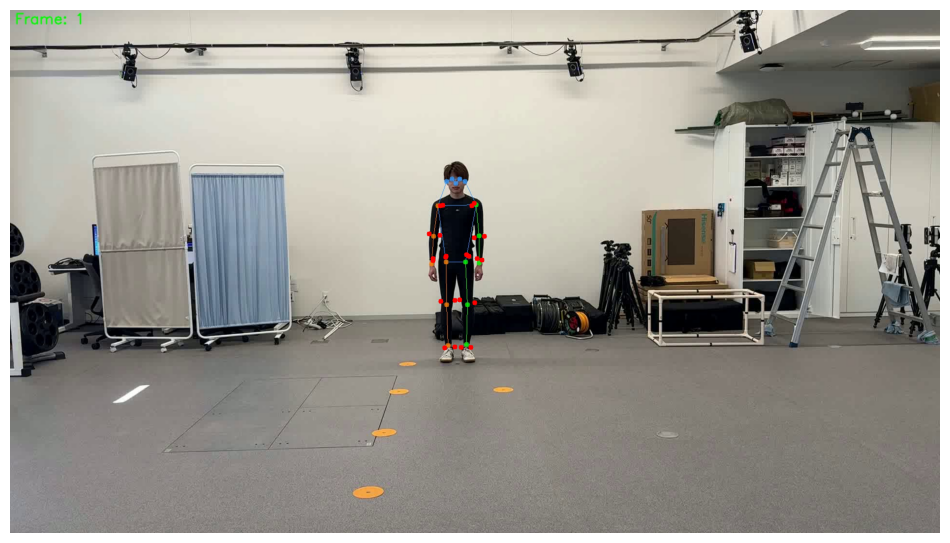

In [70]:
img_path = f"img/hirasaki_{camera_num}_{data_num}/hirasaki_{camera_num}_{data_num}_1.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

idx = 1
for col in columns_basic:
    x, y = df_2d_projected.loc[idx, [col + "_x", col + "_y"]]
    cv2.circle(img, (int(x), int(y)), 5, (255, 0, 0), -1)

plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.axis("off")
plt.show()

In [71]:
# 動画の作成
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(f"28/hirasaki_{camera_num}_{data_num}_projected.mp4", fourcc, 30.0, (img.shape[1], img.shape[0]))

idx = 1
while True:
    if idx in df_2d_projected.index:
        img = cv2.imread(f"img/hirasaki_{camera_num}_{data_num}/hirasaki_{camera_num}_{data_num}_{idx+lag}.jpg")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        for col in columns_basic:
            x, y = df_2d_projected.loc[idx, [col + "_x", col + "_y"]]
            cv2.circle(img, (int(x), int(y)), 5, (255, 0, 0), -1)
        video.write(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
        idx += 1
    else:
        break

video.release()